In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


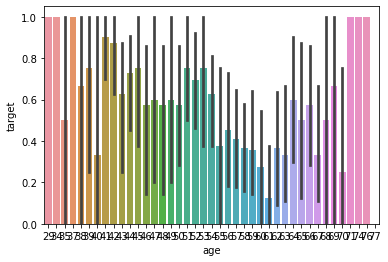

In [5]:
sns.barplot(x=df['age'],y=df['target'])

(array([ 1., 11., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <a list of 10 Patch objects>)

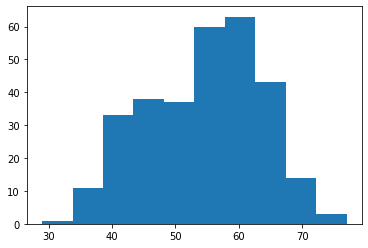

In [6]:
plt.hist(x=df['age'],histtype='bar')

(array([ 1.,  6., 11., 26., 35., 53., 77., 63., 26.,  5.]),
 array([ 71. ,  84.1,  97.2, 110.3, 123.4, 136.5, 149.6, 162.7, 175.8,
        188.9, 202. ]),
 <a list of 10 Patch objects>)

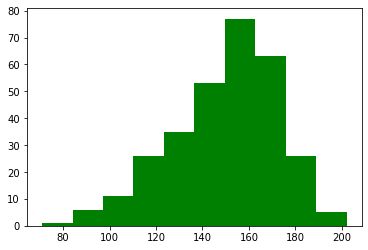

In [7]:
plt.hist(x=df['thalach'],histtype='bar',color='green')

(array([ 12.,  73., 106.,  69.,  35.,   3.,   4.,   0.,   0.,   1.]),
 array([126. , 169.8, 213.6, 257.4, 301.2, 345. , 388.8, 432.6, 476.4,
        520.2, 564. ]),
 <a list of 10 Patch objects>)

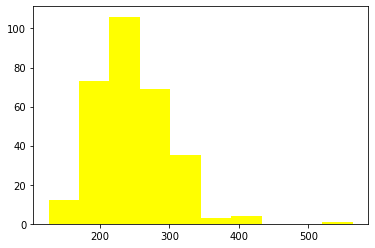

In [8]:
plt.hist(x=df['chol'],histtype='bar',color='yellow')

In [9]:
from sklearn.preprocessing import StandardScaler , LabelEncoder
scaler = StandardScaler()

In [10]:
label = LabelEncoder()
train = df.iloc[:,:-1]
train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [11]:
train['oldpeak'] = label.fit_transform(train['oldpeak'])

In [12]:
target = df['target']

In [14]:
X_scaled = scaler.fit_transform(train)

In [16]:
from sklearn.metrics import roc_curve , roc_auc_score , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier()
X_train,X_test,y_train,y_test = train_test_split(X_scaled,target,test_size=0.4,random_state=120)
grad.fit(X_train,y_train)
y_pred=grad.predict(X_test)
accuracy_score(y_pred,y_test)

0.8524590163934426

In [17]:
auc = roc_auc_score(y_test,y_pred)
confusion = confusion_matrix(y_test,y_pred)
tp = confusion[0][0]
fp = confusion[0][1]
fn = confusion[1][0]
tn = confusion[1][1]


array([[43,  8],
       [10, 61]], dtype=int64)

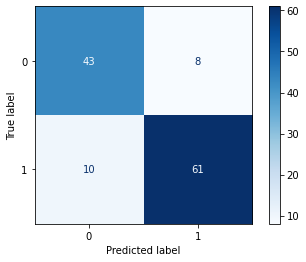

In [18]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(grad,X_test,y_test,cmap=plt.cm.Blues,normalize=None)
#disp = plot_confusion_matrix(lg,X_test,y_test,cmap='viridis',normalize=None)
disp.confusion_matrix

In [19]:

# finding accuracy 
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy

0.8524590163934426

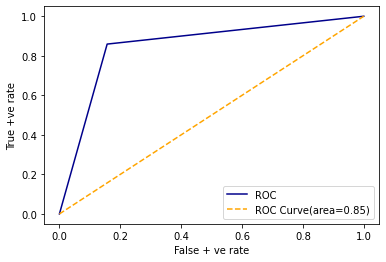

In [20]:
fpr , tpr , thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,color = 'darkblue',label = 'ROC')
plt.plot([0,1],[0,1],color='orange',linestyle='--',label="ROC Curve(area=%0.2f)"%auc)
plt.xlabel('False + ve rate')
plt.ylabel('True +ve rate')
plt.legend()
plt.show()